In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

# XOR Problem

* XOR 로 표시되는 정보를 구분해보자

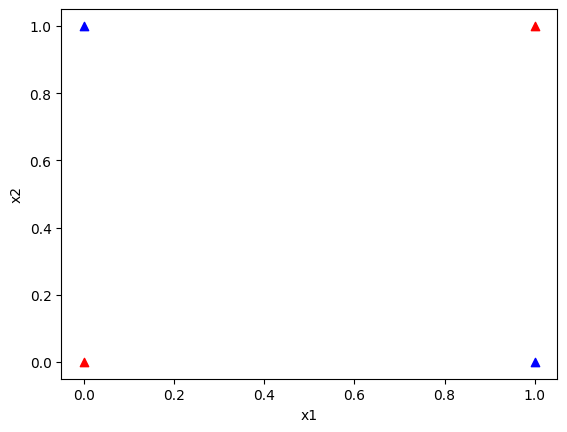

In [ ]:
x_data = [[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]
y_data = [[0.],
          [1.],
          [1.],
          [0.]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Dataset 준비



In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# Multi-layer perceptron

In [ ]:
W1 = tf.Variable(tf.random.normal([2, 1]), name='weight1')
b1 = tf.Variable(tf.random.normal([1]), name='bias1')

W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

W3 = tf.Variable(tf.random.normal([2, 1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

## Layers 구성

In [ ]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)

    return hypothesis

## Loss Function

In [ ]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)

In [ ]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

## Training


In [ ]:
EPOCHS = 10000

for step in range(EPOCHS+1):
    for features, labels  in dataset:
        grads = grad(neural_net(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))


Iter: 0, Loss: 0.8910
Iter: 1000, Loss: 0.6215
Iter: 2000, Loss: 0.4602
Iter: 3000, Loss: 0.3974
Iter: 4000, Loss: 0.3768
Iter: 5000, Loss: 0.3676
Iter: 6000, Loss: 0.3625
Iter: 7000, Loss: 0.3593
Iter: 8000, Loss: 0.3571
Iter: 9000, Loss: 0.3556
Iter: 10000, Loss: 0.3544


In [ ]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [ ]:
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 0.5000


###with Tensorflow

In [ ]:
model = Sequential([
    layers.Dense(2, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
def loss_fn(model, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(model) + (1 - labels) * tf.math.log(1 - model))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)

In [ ]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(model(features),labels)
    return tape.gradient(loss_value, model.trainable_variables)

In [ ]:
EPOCHS = 10000

for step in range(EPOCHS+1):
    for features, labels  in dataset:
        grads = grad(model(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(model(features),labels)))


Iter: 0, Loss: 0.6943
Iter: 1000, Loss: 0.6809
Iter: 2000, Loss: 0.5260
Iter: 3000, Loss: 0.1655
Iter: 4000, Loss: 0.0714
Iter: 5000, Loss: 0.0432
Iter: 6000, Loss: 0.0305
Iter: 7000, Loss: 0.0234
Iter: 8000, Loss: 0.0189
Iter: 9000, Loss: 0.0159
Iter: 10000, Loss: 0.0137


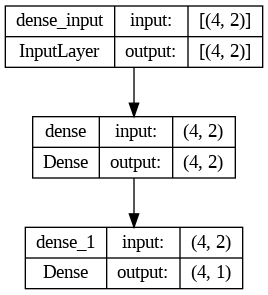

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
for features, labels  in dataset:
    print("Test Data")
    print(features.numpy())
    print("Label")
    print(labels.numpy())
    pred = model(features)
    print("Pred : ")
    print(pred.numpy())
    test_acc = accuracy_fn(pred, labels)
    print("Testset Accuracy: {:.4f}".format(test_acc))

Test Data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Label
[[0.]
 [1.]
 [1.]
 [0.]]
Pred : 
[[0.01323879]
 [0.9821233 ]
 [0.988081  ]
 [0.01118571]]
Testset Accuracy: 1.0000
